Đọc các file Excel trong bộ dữ liệu

In [61]:
import pandas as pd
import os
import numpy as np
import math

In [62]:
folder_path = "Data"
print(f"Đang đọc các file Excel trong thư mục: {folder_path}\n")

Đang đọc các file Excel trong thư mục: Data



Loại bỏ các giá trị Null trong các tập dữ liệu

In [63]:
# Đọc file và kiểm tra dữ liệu
for file_name in os.listdir(folder_path):
    if file_name.endswith(('.xlsx', '.xls')):
        file_path = os.path.join(folder_path, file_name)
        
        try:
            # Đọc file Excel
            data = pd.read_excel(file_path)
            
            # Lấy số hàng và số cột
            num_rows = data.shape[0]
            
            print(f"File: {file_name}")
            print(f"Kích thước: {num_rows} hàng")

            # Null checking
            null_counts = data.isnull().sum()
            
            # Hiển thị các cột có giá trị null
            if null_counts.sum() > 0:
                print("Số giá trị null theo cột:")
                print(null_counts[null_counts > 0])  # Chỉ hiển thị cột có null
                print(f"\nTổng số giá trị null: {null_counts.sum()}")
            else:
                print("Không có giá trị null nào trong file này")
            
            print("-" * 50)

        except Exception as e:
            print(f"Lỗi khi đọc file {file_name}: {e}")

File: SHGC-0.1_Tvis-0.9_Uval-0.05_modified.xlsx
Kích thước: 779 hàng
Không có giá trị null nào trong file này
--------------------------------------------------
File: SHGC-0.1_Tvis-0.9_Uval-1.00_modified.xlsx
Kích thước: 776 hàng
Không có giá trị null nào trong file này
--------------------------------------------------
File: SHGC-0.7_Tvis-0.9_Uval-0.05_modified.xlsx
Kích thước: 776 hàng
Không có giá trị null nào trong file này
--------------------------------------------------
File: SHGC-0.9_Tvis-0.9_Uval-0.05_modified.xlsx
Kích thước: 775 hàng
Không có giá trị null nào trong file này
--------------------------------------------------
Lỗi khi đọc file ~$SHGC-0.1_Tvis-0.9_Uval-0.05_modified.xlsx: [Errno 13] Permission denied: 'Data\\~$SHGC-0.1_Tvis-0.9_Uval-0.05_modified.xlsx'


Gộp tất cả các file lại vào một DataFrame

In [64]:
# Tạo DataFrame cho train và test
df = pd.DataFrame()

for file_name in os.listdir(folder_path):
    if file_name.endswith(('.xlsx', '.xls')):
        file_path = os.path.join(folder_path, file_name)
        
        try:
            # Đọc file Excel
            data = pd.read_excel(file_path)

            
            # Cộng dồn vào biến tổng
            df = pd.concat([df, data], ignore_index=True)
            
            print(f"Đã xử lý: {file_name} ({len(data)} dòng)")
            
        except Exception as e:
            print(f"Lỗi khi xử lý {file_name}: {str(e)}")

# Kết quả cuối cùng
print("\nKết quả tổng hợp:")
print(f"Tổng df: {len(df)} dòng")

Đã xử lý: SHGC-0.1_Tvis-0.9_Uval-0.05_modified.xlsx (779 dòng)
Đã xử lý: SHGC-0.1_Tvis-0.9_Uval-1.00_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.7_Tvis-0.9_Uval-0.05_modified.xlsx (776 dòng)
Đã xử lý: SHGC-0.9_Tvis-0.9_Uval-0.05_modified.xlsx (775 dòng)
Lỗi khi xử lý ~$SHGC-0.1_Tvis-0.9_Uval-0.05_modified.xlsx: [Errno 13] Permission denied: 'Data\\~$SHGC-0.1_Tvis-0.9_Uval-0.05_modified.xlsx'

Kết quả tổng hợp:
Tổng df: 3106 dòng


In [65]:
df

,in:T-Vis,in:U-val,in:SHCG,out:P1_l,out:P1_r,out:P1_x,out:P1_y,out:P2_l,out:P2_r,out:P2_x,...,out:S2_yi,out:S3_d1,out:S3_d2,out:S3_d3,out:S3_d4,out:S3_xi,out:S3_yi,out:Total-CoolingLoad (J),out:Total_HEAT-LOSS(J),in:SHGC
0,0.05,0.9,0.1,20.000000,0.5 * Pi,40.000000,10.000000,20.0,0.5 * Pi,60.000000,...,0.000000,14.142136,14.142136,14.142136,14.142136,50.000000,0.000000,1882600000000,125510000000,NaN
1,0.05,0.9,0.1,22.679492,0.5 * Pi,37.320508,20.000000,20.0,0.5 * Pi,57.320508,...,10.446582,14.142136,14.142136,14.142136,14.142136,47.320508,10.000000,1848600000000,128940000000,NaN
2,0.05,0.9,0.1,25.773503,0.5 * Pi,30.000000,27.320508,20.0,0.5 * Pi,50.000000,...,18.282759,14.142136,14.142136,14.142136,14.142136,40.000000,17.320508,1794900000000,133580000000,NaN
3,0.05,0.9,0.1,30.000000,0.5 * Pi,20.000000,30.000000,20.0,0.5 * Pi,40.000000,...,21.666667,14.142136,14.142136,14.142136,14.142136,30.000000,20.000000,1807000000000,132440000000,NaN
4,0.05,0.9,0.1,37.320508,0.5 * Pi,10.000000,27.320508,20.0,0.5 * Pi,30.000000,...,20.207259,14.142136,14.142136,14.142136,14.142136,20.000000,17.320508,1846900000000,130010000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3101,0.05,0.9,0.9,2.679492,2.094395,5.000000,-11.339746,20.0,2.094395,22.320508,...,-16.250000,14.142136,14.142136,14.142136,14.142136,8.660254,-25.000000,10899000000000,17041000000,NaN
3102,0.05,0.9,0.9,10.000000,2.094395,12.320508,-18.660254,20.0,2.094395,29.641016,...,-23.347217,14.142136,14.142136,14.142136,14.142136,15.980762,-32.320508,11035000000000,17255000000,NaN
3103,0.05,0.9,0.9,14.226497,2.094395,22.320508,-21.339746,20.0,2.094395,39.641016,...,-25.694444,14.142136,14.142136,14.142136,14.142136,25.980762,-35.000000,11179000000000,16943000000,NaN
3104,0.05,0.9,0.9,17.320508,2.094395,32.320508,-18.660254,20.0,2.094395,49.641016,...,-22.677344,14.142136,14.142136,14.142136,14.142136,35.980762,-32.320508,11183000000000,17098000000,NaN


Chuyển giá trị Pi về số thực

In [66]:
# Chuyển tất cả các giá trị chứa "Pi" thành số thực
# ---------------------------------
def replace_pi_with_float(df):
    df = df.copy()

    # Thay thế 'Pi' thành giá trị số thực
    df = df.replace({'Pi': math.pi})

    # Thay thế các biểu thức dạng 'a * Pi' thành số thực
    for col in df.columns:
        # Duyệt qua từng ô và xử lý
        df[col] = df[col].apply(lambda x: eval(str(x).replace('Pi', 'math.pi')) if isinstance(x, str) else x)

    # Xử lý các giá trị NaN sau khi chuyển đổi
    df = df.fillna(0)  # Thay thế NaN bằng 0
    # Hoặc loại bỏ các hàng có NaN
    # df = df.dropna()  # Bỏ các hàng chứa NaN

    return df

In [67]:
# Áp dụng cho cả train và test
print ("Dữ liệu trước khi chuyển đổi giá trị 'PI':")
df.head()

Dữ liệu trước khi chuyển đổi giá trị 'PI':


,in:T-Vis,in:U-val,in:SHCG,out:P1_l,out:P1_r,out:P1_x,out:P1_y,out:P2_l,out:P2_r,out:P2_x,...,out:S2_yi,out:S3_d1,out:S3_d2,out:S3_d3,out:S3_d4,out:S3_xi,out:S3_yi,out:Total-CoolingLoad (J),out:Total_HEAT-LOSS(J),in:SHGC
0,0.05,0.9,0.1,20.000000,0.5 * Pi,40.000000,10.000000,20.0,0.5 * Pi,60.000000,...,0.000000,14.142136,14.142136,14.142136,14.142136,50.000000,0.000000,1882600000000,125510000000,NaN
1,0.05,0.9,0.1,22.679492,0.5 * Pi,37.320508,20.000000,20.0,0.5 * Pi,57.320508,...,10.446582,14.142136,14.142136,14.142136,14.142136,47.320508,10.000000,1848600000000,128940000000,NaN
2,0.05,0.9,0.1,25.773503,0.5 * Pi,30.000000,27.320508,20.0,0.5 * Pi,50.000000,...,18.282759,14.142136,14.142136,14.142136,14.142136,40.000000,17.320508,1794900000000,133580000000,NaN
3,0.05,0.9,0.1,30.000000,0.5 * Pi,20.000000,30.000000,20.0,0.5 * Pi,40.000000,...,21.666667,14.142136,14.142136,14.142136,14.142136,30.000000,20.000000,1807000000000,132440000000,NaN
4,0.05,0.9,0.1,37.320508,0.5 * Pi,10.000000,27.320508,20.0,0.5 * Pi,30.000000,...,20.207259,14.142136,14.142136,14.142136,14.142136,20.000000,17.320508,1846900000000,130010000000,NaN


In [68]:
# In kết quả sau khi chuyển đổi
df = replace_pi_with_float(df)
print("Dữ liệu sau khi chuyển đổi giá trị 'Pi':")
df.head()

Dữ liệu sau khi chuyển đổi giá trị 'Pi':


,in:T-Vis,in:U-val,in:SHCG,out:P1_l,out:P1_r,out:P1_x,out:P1_y,out:P2_l,out:P2_r,out:P2_x,...,out:S2_yi,out:S3_d1,out:S3_d2,out:S3_d3,out:S3_d4,out:S3_xi,out:S3_yi,out:Total-CoolingLoad (J),out:Total_HEAT-LOSS(J),in:SHGC
0,0.05,0.9,0.1,20.000000,1.570796,40.000000,10.000000,20.0,1.570796,60.000000,...,0.000000,14.142136,14.142136,14.142136,14.142136,50.000000,0.000000,1882600000000,125510000000,0.0
1,0.05,0.9,0.1,22.679492,1.570796,37.320508,20.000000,20.0,1.570796,57.320508,...,10.446582,14.142136,14.142136,14.142136,14.142136,47.320508,10.000000,1848600000000,128940000000,0.0
2,0.05,0.9,0.1,25.773503,1.570796,30.000000,27.320508,20.0,1.570796,50.000000,...,18.282759,14.142136,14.142136,14.142136,14.142136,40.000000,17.320508,1794900000000,133580000000,0.0
3,0.05,0.9,0.1,30.000000,1.570796,20.000000,30.000000,20.0,1.570796,40.000000,...,21.666667,14.142136,14.142136,14.142136,14.142136,30.000000,20.000000,1807000000000,132440000000,0.0
4,0.05,0.9,0.1,37.320508,1.570796,10.000000,27.320508,20.0,1.570796,30.000000,...,20.207259,14.142136,14.142136,14.142136,14.142136,20.000000,17.320508,1846900000000,130010000000,0.0


In [69]:
from sklearn.preprocessing import MinMaxScaler

# Khởi tạo scaler
scaler = MinMaxScaler()

# Scale dữ liệu trong df
scaled_df_standard = scaler.fit_transform(df)

# Chuyển đổi kết quả về DataFrame
scaled_df_standard = pd.DataFrame(scaled_df_standard, columns=df.columns)

# Kiểm tra kết quả
print(scaled_df_standard.head())


   in:T-Vis  in:U-val   in:SHCG  out:P1_l  out:P1_r  out:P1_x  out:P1_y  \
0       1.0       0.0  0.111111  0.500000       0.5  0.848915  0.587229   
1       1.0       0.0  0.111111  0.577350       0.5  0.825542  0.674458   
2       1.0       0.0  0.111111  0.666667       0.5  0.761686  0.738314   
3       1.0       0.0  0.111111  0.788675       0.5  0.674458  0.761686   
4       1.0       0.0  0.111111  1.000000       0.5  0.587229  0.738314   

   out:P2_l  out:P2_r  out:P2_x  ...  out:S2_yi  out:S3_d1  out:S3_d2  \
0       0.5       0.5  0.981382  ...   0.500000   0.175776   0.175776   
1       0.5       0.5  0.959885  ...   0.660717   0.175776   0.175776   
2       0.5       0.5  0.901152  ...   0.781273   0.175776   0.175776   
3       0.5       0.5  0.820922  ...   0.833333   0.175776   0.175776   
4       0.5       0.5  0.740691  ...   0.810881   0.175776   0.175776   

   out:S3_d3  out:S3_d4  out:S3_xi  out:S3_yi  out:Total-CoolingLoad (J)  \
0    0.11071    0.11071   1.000000

Check Datatype của dữ liệu

In [70]:
scaled_df_standard.dtypes

in:T-Vis                     float64
in:U-val                     float64
in:SHCG                      float64
out:P1_l                     float64
out:P1_r                     float64
out:P1_x                     float64
out:P1_y                     float64
out:P2_l                     float64
out:P2_r                     float64
out:P2_x                     float64
out:P2_y                     float64
out:P3_l                     float64
out:P3_r                     float64
out:P3_x                     float64
out:P3_y                     float64
out:P4_l                     float64
out:P4_r                     float64
out:P4_x                     float64
out:P4_y                     float64
out:P5_l                     float64
out:P5_r                     float64
out:P5_x                     float64
out:P5_y                     float64
out:P6_l                     float64
out:P6_r                     float64
out:P6_x                     float64
out:P6_y                     float64
o

Thống ke mô tả dữ liệu

In [71]:
stats = scaled_df_standard.describe()
stats

,in:T-Vis,in:U-val,in:SHCG,out:P1_l,out:P1_r,out:P1_x,out:P1_y,out:P2_l,out:P2_r,out:P2_x,...,out:S2_yi,out:S3_d1,out:S3_d2,out:S3_d3,out:S3_d4,out:S3_xi,out:S3_yi,out:Total-CoolingLoad (J),out:Total_HEAT-LOSS(J),in:SHGC
count,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,...,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000
mean,0.750161,0.249839,0.471704,0.499458,0.499732,0.500294,0.500138,0.499350,0.499678,0.500196,...,0.500152,0.297909,0.296294,0.232052,0.230849,0.500317,0.500180,0.417845,0.257049,0.249839
std,0.432989,0.432989,0.425799,0.276486,0.296744,0.221217,0.222262,0.254753,0.295974,0.265949,...,0.288366,0.287549,0.287744,0.273147,0.273267,0.279032,0.278638,0.400001,0.361666,0.432989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.111111,0.288675,0.166667,0.316987,0.316987,0.333333,0.333333,0.262189,...,0.218727,0.075538,0.075538,0.047975,0.047975,0.240192,0.240192,0.021516,0.005423,0.000000
50%,1.000000,0.000000,0.111111,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.294763,0.294763,0.166732,0.166732,0.500000,0.500000,0.058149,0.128129,0.000000
75%,1.000000,0.000000,0.777778,0.711325,0.666667,0.683013,0.686144,0.666667,0.666667,0.737811,...,0.782051,0.443748,0.443748,0.317132,0.317132,0.759808,0.759808,0.798308,0.145844,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


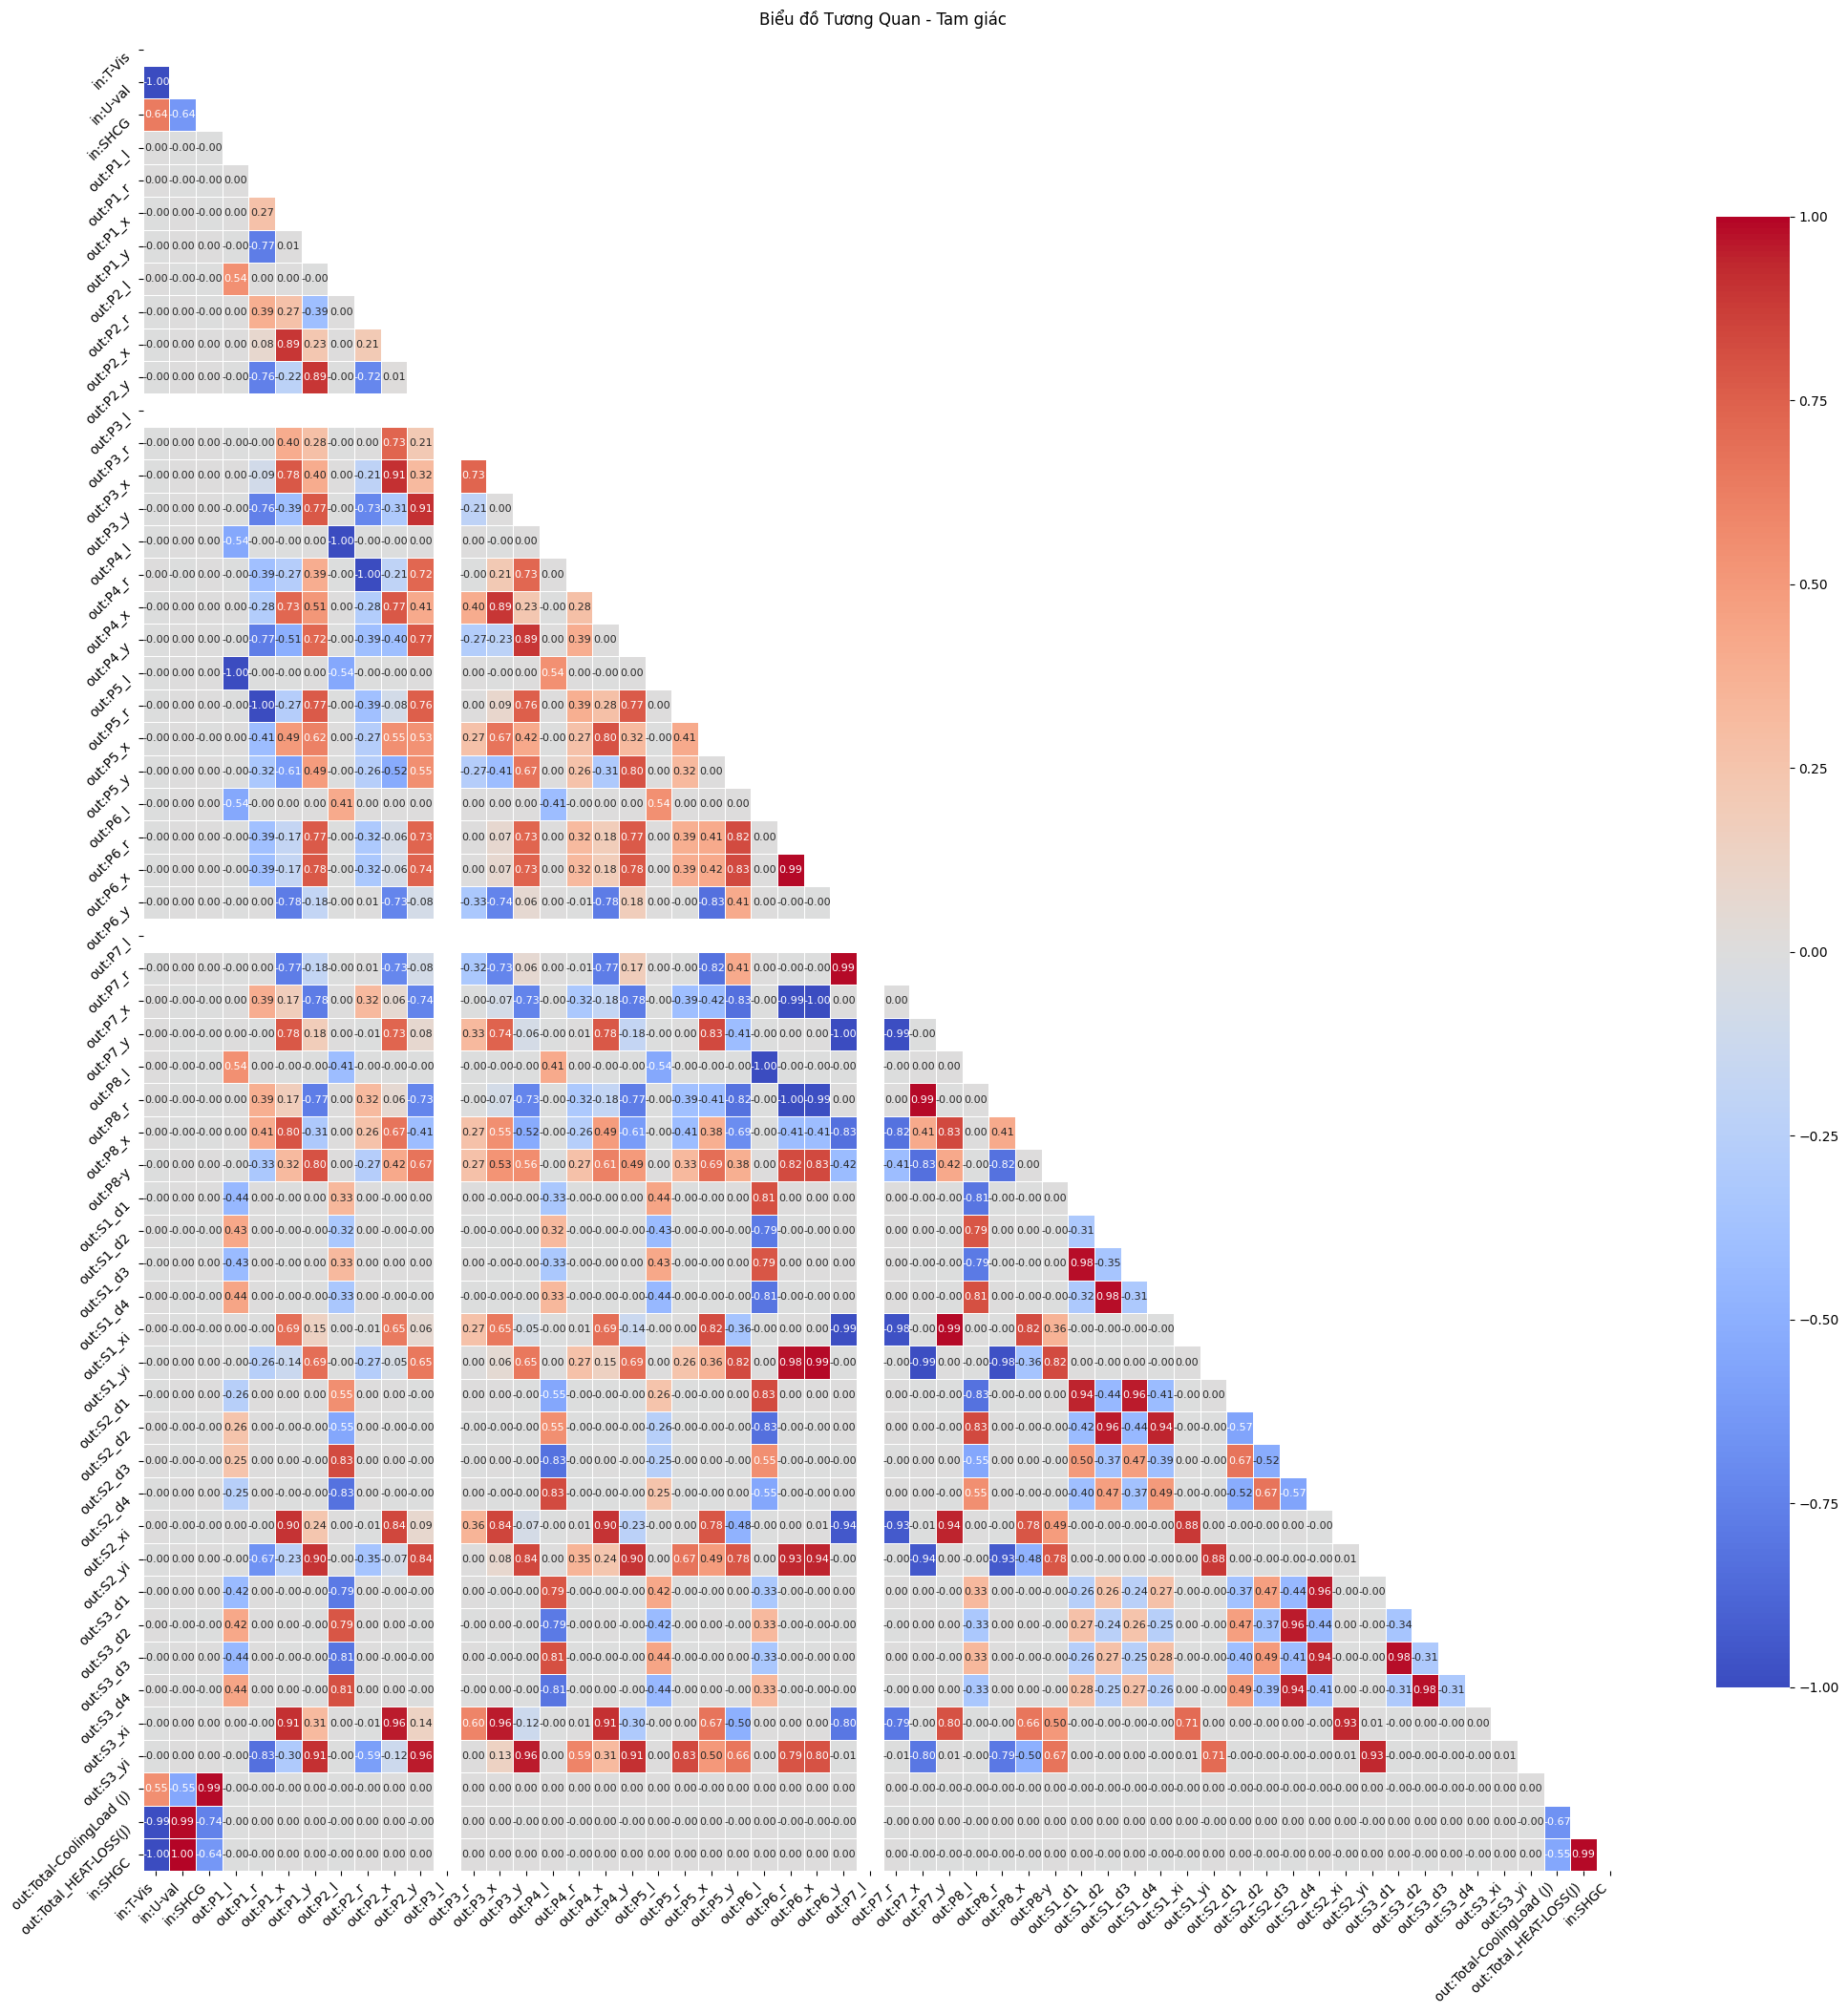

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Tính toán ma trận tương quan
corr_matrix = scaled_df_standard.corr()

# Tạo mask để chỉ vẽ phần dưới của ma trận (chỉ vẽ tam giác dưới)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Vẽ heatmap tam giác
plt.figure(figsize=(25, 25))  # Điều chỉnh kích thước biểu đồ

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, 
            annot_kws={"size": 8}, cbar_kws={"shrink": 0.8}, mask=mask)

# Xoay các nhãn trục để dễ đọc hơn
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

# Thêm tiêu đề cho biểu đồ
plt.title("Biểu đồ Tương Quan - Tam giác")

# Hiển thị biểu đồ
plt.show()


Chia dữ liệu train - test

In [73]:
from sklearn.model_selection import train_test_split
# Giả sử 'target_columns' là tên các cột biến mục tiêu của bạn
target_columns = ['out:Total-CoolingLoad (J)', 'out:Total_HEAT-LOSS(J)']

# Chia dữ liệu thành X và y
X = scaled_df_standard.drop(columns=target_columns)  # Xử lý các cột đặc trưng
y = scaled_df_standard[target_columns]  # Cột mục tiêu

# Chia thành tập train và test cho cả X và y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kiểm tra kích thước của các tập train và test
print(f"Kích thước tập X_train: {X_train.shape}")
print(f"Kích thước tập X_test: {X_test.shape}")
print(f"Kích thước tập y_train: {y_train.shape}")
print(f"Kích thước tập y_test: {y_test.shape}")


Kích thước tập X_train: (2484, 54)
Kích thước tập X_test: (622, 54)
Kích thước tập y_train: (2484, 2)
Kích thước tập y_test: (622, 2)
